In [2]:
!pip install -r requirements.txt
import importlib
import VQGAN_CLIP
importlib.reload(VQGAN_CLIP)
vqgan_clip = VQGAN_CLIP.VQGAN_CLIP(
    device="cuda",
)

ImportError: cannot import name 'VQGAN' from 'taming.models' (/opt/homebrew/Caskroom/miniforge/base/envs/face_edit/lib/python3.9/site-packages/taming/models/__init__.py)

/opt/homebrew/Caskroom/miniforge/base/envs/face_edit/lib/python3.9/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


{'prompts': ['a happy woman'], 'weights': tensor([1.], device='mps:0')}
[]
Original Image


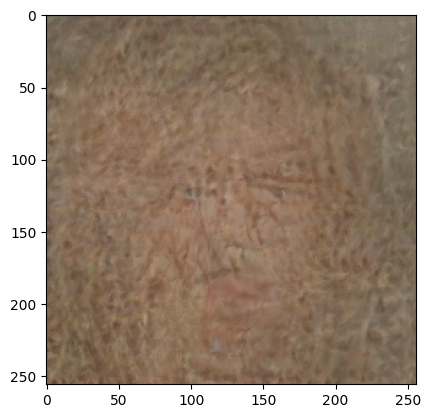

TypeError: Operation 'log_out_mps()' does not support input type 'int64' in MPS backend.

In [10]:
vqgan_clip.generate(
    pos_prompts=["a happy woman"],
    show_intermediate=True,
)